# Intro

As opposed to supervised learning, in unsupervised learning the goal is to infer a model which describes an unknown structure from unlabeled data. We'll consider two classes of unsupervised learning algorithms: clustering and anomaly detection.

We'll also see how unsupervised techniques can be used to reduce the dimensionality of the input feature set.

# 1. Clustering

Clustering is the task of grouping a set of items together in such a way that items in one group (a cluster) are more similar to each other than to those in other groups. There are several types of clustering algorithms: 

*   Hierarchical clustering (e.g. Linkage clustering)
*   Centroid-based clustering (e.g. k-means)
*   Distribution-based clustering (e.g. Expectation-Maximization)
*   Density-based clustering (e.g. DBSCAN)

We will look at one of the more simpler approaches: centroid-based clustering.


## K-Means Algorithm

Suppose we have a dataset {$x_1$, $x_2$, $x_3$, ..., $x_N$} consisting of $N$ observations of $D$ dimensional vectors **x** (i.e. $D$ features).

The goal is to partition the dataset into $K$ clusters. Therefore, the number of clusters in our dataset needs to be known a priori.

A cluster is a group of data points whose distances between one another in $D$-dimensional space are small compared to points outside the cluster.

This can be formalized by introducing a $D$-dimensional mean vector $\mu_k$, where $k = 1,2,3,...K$. This represents the center of the cluster.

The K-means clustering algorithm assigns a vector $x_{i,j}$ to the cluster which minimizes the following distortion measure: $J_k = ||x_{i,j} - \mu_k||^2$

The mean vector is then updated by computing the mean intensity value of the considered cluster such that

\begin{equation}
\mu_k = \frac{\sum\limits_i \sum\limits_j r_{i,j,k}x_{i,j}}{\sum\limits_i \sum\limits_j r_{i,j}}
\end{equation}

where

\begin{equation}
r_{i,j,k}=\begin{cases}
    1, & \text{if $k = arg_k min(||x_{i,j} - \mu_k||^2)$}\\
    0, & \text{otherwise}.
  \end{cases}
\end{equation}

### A. First principles

In [6]:
# Import the necessary modules
import numpy as np
import math
import matplotlib.pyplot as plt

Let's generate a two-dimensional dataset that we can easily visualize later. 

Note that the first 7 points are similar to each other (therefore they would belong to cluster 1) while the next 7 points are also similar to each other (they would belong to cluster 2)

In [3]:
# Generate a dataset
data = np.array([[2,2], [2,3], [3,2], [3,3], [5,4], [1,1], [6,4], [15,12], [14,14], [18,14], [25,30], [21,17], [18,16], [12,18]])


In [4]:
# Randomly initialize the means to some value (x1, x2) within our two-dimensional space
means = np.array([[np.random.random()*30,np.random.random()*30], [np.random.random()*30,np.random.random()*30]])

We'll iterate 4 times, at each iteration using the K-Means algorithm to generate:



We use blue to denote the membership of a point of cluster 1, and red to denote the membership of a point of cluster 2.

Allocation of points to means - iteration: 0
These are the points closer to mean 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
These are the points closer to mean 2: [13]
Means at iteration: 0
[[25.5294319  19.44658171]
 [13.26421247 29.89365119]]


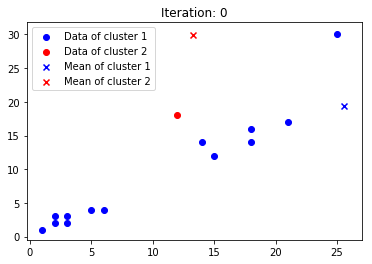

Allocation of points to means - iteration: 1
These are the points closer to mean 1: [0, 1, 2, 3, 4, 5, 6, 7]
These are the points closer to mean 2: [8, 9, 10, 11, 12, 13]
Means at iteration: 1
[[10.23076923  9.38461538]
 [12.         18.        ]]


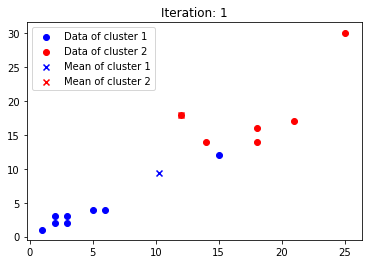

Allocation of points to means - iteration: 2
These are the points closer to mean 1: [0, 1, 2, 3, 4, 5, 6]
These are the points closer to mean 2: [7, 8, 9, 10, 11, 12, 13]
Means at iteration: 2
[[ 4.625       3.875     ]
 [18.         18.16666667]]


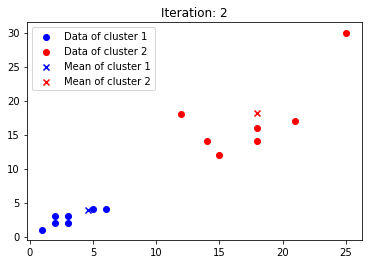

Allocation of points to means - iteration: 3
These are the points closer to mean 1: [0, 1, 2, 3, 4, 5, 6]
These are the points closer to mean 2: [7, 8, 9, 10, 11, 12, 13]
Means at iteration: 3
[[ 3.14285714  2.71428571]
 [17.57142857 17.28571429]]


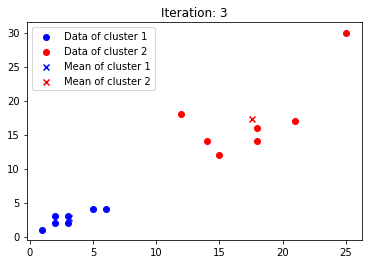

In [7]:
for i in range(0, 4):
    
    # Initialze arrays to hold which points belong to which mean
    points_mean_1 = []
    points_mean_2 = []

    # Compute Euclidean distances of each point in our dataset from both means, and check which is smallest

    for j in range(0, len(data)):

        dist1 = math.sqrt(math.pow(data[j,0] - means[0,0], 2) + math.pow(data[j,1] - means[0,1], 2))
        dist2 = math.sqrt(math.pow(data[j,0] - means[1,0], 2) + math.pow(data[j,1] - means[1,1], 2))

        if dist1 < dist2:
            points_mean_1.append(j)
        else:
            points_mean_2.append(j)

    # Intermediate results for the current iteration
            
    print("Allocation of points to means - iteration: " + str(i))
    print("These are the points closer to mean 1: " + str(points_mean_1))
    print("These are the points closer to mean 2: " + str(points_mean_2))
    
    print("Means at iteration: " + str(i))
    print(means)
    
    # Prepare data to be plotted
    
    points_1 = []
    
    for point in points_mean_1:
        points_1.append(data[point])

    points_2 = []

    for point in points_mean_2:
        points_2.append(data[point])
    
    np_points_1 = np.array(points_1)
    np_points_2 = np.array(points_2)
    
    # Make an intermediate plot of the data points and the respective means
    
    plt.figure()
    plt.title("Iteration: " + str(i))
    plt.scatter(np_points_1[:,0], np_points_1[:,1], c='b', marker='o', label="Data of cluster 1")
    plt.scatter(np_points_2[:,0], np_points_2[:,1], c='r', marker='o', label="Data of cluster 2")
    plt.scatter(means[0,0], means[0,1], c='b', marker='x', label="Mean of cluster 1")
    plt.scatter(means[1,0], means[1,1], c='r', marker='x', label="Mean of cluster 2")
    plt.legend()
    plt.show()


    # Update the means for the next iteration

    tmp_mean_1 = 0

    for j in range(0, len(points_mean_1)):
        tmp_mean_1 += data[points_mean_1[j]]

    means[0] = tmp_mean_1/len(points_mean_1)

    tmp_mean_2 = 0
    
    for j in range(0, len(points_mean_2)):
        tmp_mean_2 += data[points_mean_2[j]]
    
    means[1] = tmp_mean_2/len(points_mean_2)

Allocation of points to means
[0, 1, 2, 3, 4, 5, 6]
[7, 8, 9, 10, 11, 12, 13]
Final means:
[[ 3.14285714  2.71428571]
 [17.57142857 17.28571429]]


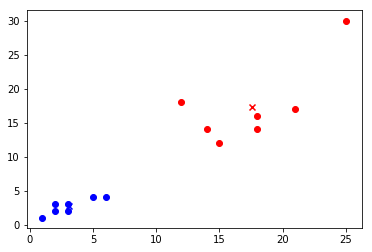

In [8]:
print("Allocation of points to means")
print(points_mean_1)
print(points_mean_2)

print("Final means:")
print(means)

points_1 = []

for point in points_mean_1:
    points_1.append(data[point])

points_2 = []

for point in points_mean_2:
    points_2.append(data[point])

np_points_1 = np.array(points_1)
np_points_2 = np.array(points_2)

plt.figure()
plt.scatter(np_points_1[:,0], np_points_1[:,1], c='b', marker='o')
plt.scatter(np_points_2[:,0], np_points_2[:,1], c='r', marker='o')
plt.scatter(means[0,0], means[0,1], c='b', marker='x')
plt.scatter(means[1,0], means[1,1], c='r', marker='x')
plt.show()

### B. Using sklearn

In [9]:
# We now import the KMeans module in sklearn
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [10]:
# Generate the data in the same way as before

data = np.array([[2,2], [2,3], [3,2], [3,3], [5,4], [1,1], [6,4], [15,12], [14,14], [18,14], [25,30], [21,17], [18,16], [12,18]])


In [11]:
# We can use a one-liner to fit our data using 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
print("The final means of each cluster: " + str(kmeans.cluster_centers_))
print("Label per data point indicating the final cluster it has been assigned to: " + str(kmeans.labels_))
print("We can predict new values using e.g. kmeans.predict([[0, 0], [4, 4]])")
print("Result = " + str(kmeans.predict([[0, 0], [17, 15]])))

The final means of each cluster: [[17.57142857 17.28571429]
 [ 3.14285714  2.71428571]]
Label per data point indicating the final cluster it has been assigned to: [1 1 1 1 1 1 1 0 0 0 0 0 0 0]
We can predict new values using e.g. kmeans.predict([[0, 0], [4, 4]])
Result = [1 0]


## 2. Anomaly Detection

Anomaly detection is the identification of outliers, which do not resemble the bulk of the dataset. Several techniques are used in anomaly detection, including:



*   k Nearest Neighbours
*   Local Outlier Factor

### A. k Nearest Neighbours Distance

The k Nearest Neighbours distance anomaly detection algorithm assigns a score to each point in the dataset based on its distance from its kth nearest neighbour.

The larger the distance score, the more likely the point is an anomaly.

In [1]:
# Import the necessary modules
import numpy as np
import matplotlib.pyplot as plt 

# Randomly generate points
data = np.random.randint(10, size=(15,2)) + 10

# Add outliers
data = np.vstack((data, np.array([5,5])))

In [2]:
# Compute distances of each point wrt all other points

def compute_distances(data):
  
  distances = np.zeros((len(data), len(data)))
  
  for i in range(0, len(data)):
    
    for j in range(0, len(data)):
      
      if i == j:
        continue
        
      distance_ij = np.sqrt(np.power(data[i,0] - data[j,0], 2) + np.power(data[i,1] - data[j,1], 2))
      
      distances[i,j] = distance_ij
      
  #print(distances)
  
  return distances
  
  
distances = compute_distances(data)

In [3]:
# For each point, sort the distances and check which is the (k + 1)th nearest neighbour

def generate_knn_distances(k, distances):

  knn_distances = []

  for i in range(0, len(data)):

    sorted_distances = np.sort(distances[i,:])

    knn_distances.append(sorted_distances[k+1])


  return np.array(knn_distances)

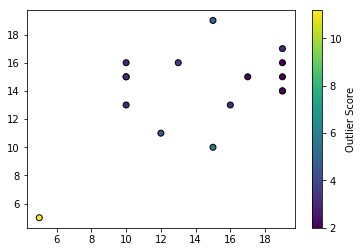

In [4]:
# Plot scatter plot with heat map

knn_distances = generate_knn_distances(3, distances)

plt.scatter(data[:,0], data[:,1], c=knn_distances, edgecolors='black')
cb = plt.colorbar()
cb.set_label('Outlier Score')
plt.show()

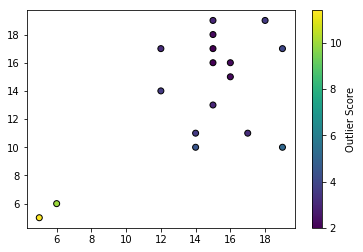

In [5]:
# Randomly generate points

data = np.random.randint(10, size=(15,2)) + 10

# Add outliers

data = np.vstack((data, np.array([[5,5], [6,6]])))

distances = compute_distances(data)

knn_distances = generate_knn_distances(3, distances)

plt.scatter(data[:,0], data[:,1], c=knn_distances, edgecolors='black')
cb = plt.colorbar()
cb.set_label('Outlier Score')
plt.show()

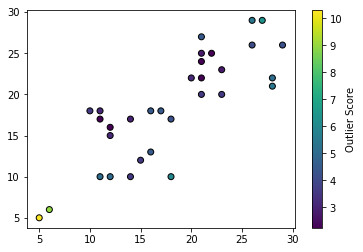

In [6]:
# Randomly generate points

data_1 = np.random.randint(10, size=(15,2)) + 10

data_2 = np.random.randint(10, size=(15,2)) + 20

# Add outliers

data = np.vstack((data_1, data_2))

data = np.vstack((data, np.array([[5,5], [6,6]])))

distances = compute_distances(data)

knn_distances = generate_knn_distances(3, distances)

plt.scatter(data[:,0], data[:,1], c=knn_distances, edgecolors='black')
cb = plt.colorbar()
cb.set_label('Outlier Score')
plt.show()

### B. Local Outlier Factor

We'll be looking at an example adapted from one provided by [scikit-learn](https://http://scikit-learn.org/stable/modules/outlier_detection.html).

In [38]:
# Import the necessary modules

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [39]:
# Generate 100 samples train data
X = 0.3 * np.random.randn(100, 2)

# Generate 20 abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# Generate two clusters based on X, centered around (-2, -2) and (2, 2) respectively.
# Also add the abnormal data.
X = np.r_[X + 2, X - 2, X_outliers]

In [40]:
# fit the model
clf = LocalOutlierFactor(n_neighbors=20) #n_neighbours: the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood. k defines the number of nearest neighbours for computation of local density. 
y_pred = clf.fit_predict(X)
y_pred_outliers = y_pred[200:]

#fit_predict: 1 = inlier, -1 = outlier

# Let's see how many of the original anomalies were correctly guessed
print(y_pred_outliers)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1]


/home/vagrant/.pyenv/versions/py3/lib/python3.6/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


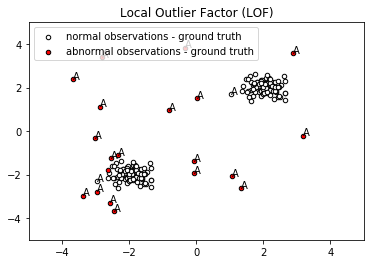

In [41]:
fig, ax = plt.subplots()

plt.title("Local Outlier Factor (LOF)")

# The first half of the dataset contains the normal data, while the second half contains the outliers
a = plt.scatter(X[:200, 0], X[:200, 1], c='white',
                edgecolor='k', s=20)
b = plt.scatter(X[200:, 0], X[200:, 1], c='red',
                edgecolor='k', s=20)

# Annotate the outliers provided by fit_predict
for i in range(len(y_pred)):
  
  if y_pred[i] == -1:
    ax.annotate("A", (X[i,0], X[i,1]))

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a, b],
           ["normal observations - ground truth",
            "abnormal observations - ground truth"],
           loc="upper left")
plt.show()

## 3. Feature dimensionality reduction

Principal Components Analysis (PCA) is an unsupervised learning technique which reduces the dimensionality of the features.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# load make_blobs to simulate data
from sklearn.datasets import make_blobs
# load decomposition to do PCA analysis with sklearn
from sklearn import decomposition

In [3]:
X1, Y1 = make_blobs(n_features=10, 
         n_samples=100,
         centers=4, random_state=4,
         cluster_std=2)
print(X1.shape)

(100, 10)


In [4]:
pca = decomposition.PCA(n_components=4)

In [5]:
pc = pca.fit_transform(X1)

In [6]:
pc_df = pd.DataFrame(data = pc , 
        columns = ['PC1', 'PC2','PC3','PC4'])
pc_df['Cluster'] = Y1
pc_df.head()

,PC1,PC2,PC3,PC4,Cluster
0,-8.133443,-0.302138,9.984672,0.423878,2
1,18.931381,0.193838,0.045462,-3.894042,1
2,-6.571463,-14.188490,-3.120115,1.278588,0
3,-7.533948,14.439427,-5.443487,3.358252,3
4,-4.591760,-11.315284,-9.130630,-1.420151,0


In [7]:
pca.explained_variance_ratio_

array([0.41594854, 0.3391866 , 0.1600729 , 0.02016822])

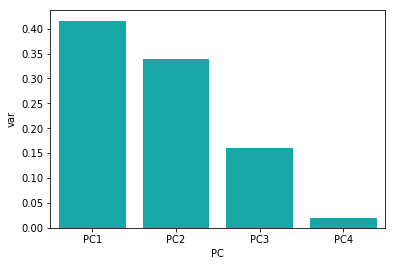

In [8]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4']})
sns.barplot(x='PC',y="var", 
           data=df, color="c");

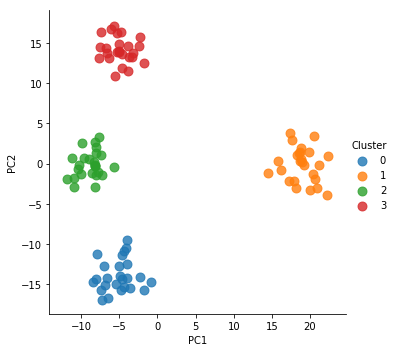

In [9]:
sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=True,
  scatter_kws={"s": 80}) # specify the point size

No handles with labels found to put in legend.


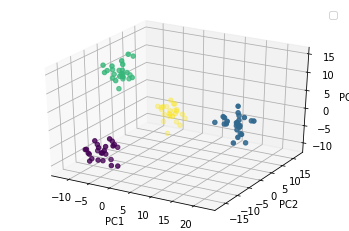

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pc_df['PC1'], pc_df['PC2'], pc_df['PC3'], c=pc_df['Cluster'])
ax.legend()
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()


## Exercise

 1) Perform K-means clustering on both the original and the PCA-reduced blob dataset. Do you get the same results? 

(Note: the cluster indices assigned by K-means and the ground truth labels of the blob dataset may differ)

 2) In K-means, we need to know the number of clusters in advance. Try using the DBSCAN algorithm instead, once again on both the original and the PCA-reduced dataset, and see if you get the same results. 

(Note: DBSCAN requires the eps parameter to be set, i.e. the maximum distance between two samples for them to be considered as in the same neighborhood)